# Project_Notes_008

## British Airways Customer Review
In this project, 100 pages of a British Airways customer review website is scraped with BeutifulSoap with the collected data saved as a csv file and used for analysis of word frequency Bar Chart, Word Cloud, Sentiment Analysis and Polarity Analysis.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Create a scrapping programme.
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
# Save the scrapped data into a dataframe.
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | As always when I fly BA it ...
1,✅ Trip Verified | First time using BA busines...
2,Not Verified | Extremely rude ground service....
3,✅ Trip Verified | My son and I flew to Geneva...
4,✅ Trip Verified | For the price paid (bought ...


In [4]:
# Save df to data folder.
df.to_csv("data/Project_Notes_008_BA_reviews.csv")

In [ ]:
# Download 'en_core_web_sm' only once.
from spacy.cli import download
print(download('en_core_web_sm'))

In [ ]:
# Download required modules only once.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

In [2]:
# Surpress Warnings.
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Import required modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re
import contractions
import spacy
import nltk
import itertools
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Import the data into a dataframe, print head and shape
df = pd.read_csv("data/Project_Notes_008_BA_reviews.csv", index_col=0, dtype='str')

print(df.head(), "\n")
print(df.shape)

                                             reviews
0  ✅ Trip Verified |  As always when I fly BA it ...
1  ✅ Trip Verified |  First time using BA busines...
2  Not Verified |  Extremely rude ground service....
3  ✅ Trip Verified |  My son and I flew to Geneva...
4  ✅ Trip Verified |  For the price paid (bought ... 

(3731, 1)


In [4]:
# Get info of the dataframe.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3731 entries, 0 to 3730
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3731 non-null   object
dtypes: object(1)
memory usage: 58.3+ KB
None


In [5]:
# Remove check mark.
df['reviews'] = (df['reviews'].str.lower()).str.replace("✅", "")

In [6]:
# Remove punctuations.
signs = string.punctuation

for sign in list(signs):
    for row in range(df.shape[0]):
        df['reviews'][row] = df['reviews'][row].replace(sign, '')

In [7]:
# Remove numbers.
for row in range(df.shape[0]):
    df['reviews'][row] = ''.join([i for i in df['reviews'][row] if not i.isdigit()])

In [8]:
# Remove extra space.
for row in range(df.shape[0]):
    df['reviews'][row] = " ".join(df['reviews'][row].split())

In [9]:
# Remove punctuations repetitions.
for row in range(df.shape[0]):
    df['reviews'][row] = re.sub(r'(!|.)1+', '', df['reviews'][row])

In [10]:
# Remove contractions.
for row in range(df.shape[0]):
    df['reviews'][row] = contractions.fix(df['reviews'][row])

In [11]:
# Remove stop words.
STOPWORDS = set(stopwords.words('english'))

for row in range(df.shape[0]):
    df['reviews'][row] = " ".join([word for word in str(df['reviews'][row]).split() if word not in STOPWORDS])

In [12]:
# Combine to one document and view first 2000 characters
document = ''

for row in range(df.shape[0]):
    document = document + ' ' + df['reviews'][row]

In [13]:
# Count 15 most common words.
from collections import Counter
counter = Counter(word_tokenize(document))
counter.most_common(15)

[('flight', 6667),
 ('ba', 4799),
 ('service', 2845),
 ('seat', 2382),
 ('food', 2358),
 ('verified', 2193),
 ('london', 2190),
 ('british', 2166),
 ('crew', 2161),
 ('airways', 2148),
 ('seats', 2113),
 ('good', 2089),
 ('time', 2064),
 ('cabin', 1988),
 ('class', 1906)]

In [14]:
# check length of document.
len(document)

2147700

In [15]:
# Remove the 'trip' and  'verified' words.
common_words = ['trip', 'verified', 'flight', 'ba', 'british', 'airways', 'one']

for row in range(df.shape[0]):
    df['reviews'][row] = " ".join([word for word in str(df['reviews'][row]).split() if word not in common_words])

In [16]:
# Change seats to seat.
for row in range(df.shape[0]):
    df['reviews'][row] = " ".join([x if x not in ['seats'] else 'seat' for x in str(df['reviews'][row]).split()])

In [17]:
# Combine to one document and view first 2000 characters.
document = ''

for row in range(df.shape[0]):
    document = document + ' ' + df['reviews'][row]

document[:2000]

' always fly total shambles booked manchester london madrid first leg iberia nd try wherever possible avoid however manchester london late however ran ib got b gates boarding started group went board gate sounded alarm removed ib hours later reissued ticket ib could put back hours wasted ba’s total incompetence airline total disgrace crew nice typical crew oh fabulous need nice paying passengers club europe cramped terrible food first time using business class pleased service received waiting check inbag drop security minutes used lounge b gates area found quiet plenty food drink offer boarding quick cabin xx layout seat although larger cabin behind seat food drinks plenty full good quality service cabin crew excellent cabin manager lauren even made birthday card found wife’s special birthday departed early arrived jfk early well thing disliked paying £ select seat free wifi extremely rude ground service nonrev flying london connectionlayover gate agent extremely rude forced check carr

In [18]:
# check length of document.
len(document)

2015621

In [19]:
# Count 15 most common words.
from collections import Counter
counter = Counter(word_tokenize(document))
counter.most_common(15)

[('seat', 4495),
 ('service', 2845),
 ('food', 2358),
 ('london', 2190),
 ('crew', 2161),
 ('good', 2089),
 ('time', 2064),
 ('cabin', 1988),
 ('class', 1906),
 ('would', 1706),
 ('business', 1597),
 ('staff', 1582),
 ('heathrow', 1540),
 ('economy', 1440),
 ('get', 1352)]

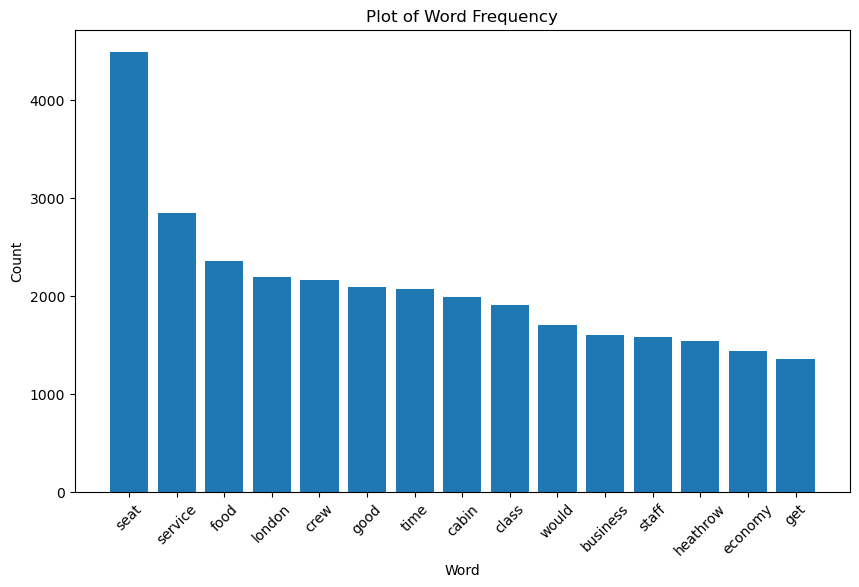

In [20]:
# Plot bar chart of the 15 most common words.
plt.figure(figsize=(10, 6))
plt.bar(*zip(*(counter.most_common(15))))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Plot of Word Frequency')
plt.xticks(rotation=45)
plt.show()

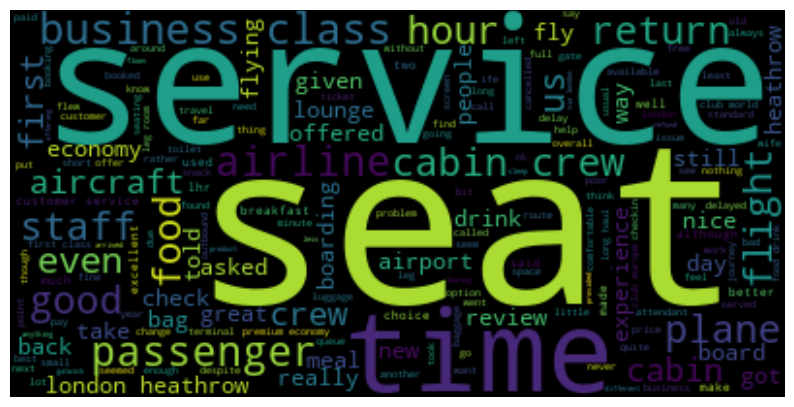

In [21]:
# Create WordCloud.
cloud_ba = WordCloud().generate(document)
plt.figure(figsize=(10, 6))
plt.imshow(cloud_ba, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# Extract the document list.
documents_list= df['reviews'].tolist()

In [23]:
# Initialize regex tokenizer.
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF.
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents.
train_data = tfidf.fit_transform(documents_list)

In [24]:
# Define the number of topics or components.
num_components=5

# Create LDA object.
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data.
lda_matrix = model.fit_transform(train_data)

# Get Components.
lda_components=model.components_

In [25]:
# Print the topics with their terms.
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['nassau', 'potatoes', 'bite', 'socket', 'sockets', 'abuja', 'vod']
Topic 1:  ['seat', 'service', 'good', 'food', 'crew', 'class', 'london']
Topic 2:  ['leeds', 'plug', 'bradford', 'drawback', 'unremarkable', 'comair', 'jnblhr']
Topic 3:  ['murcia', 'carolina', 'barbara', 'duslhr', 'geupu', 'jakarta', 'singaporelondon']
Topic 4:  ['kos', 'george', 'thinner', 'strolled', 'frustrate', 'ignorant', 'inseat']


In [26]:
# Create a 'calc_polarity' column.
df['calc_polarity'] = [round(TextBlob(x).sentiment.polarity, 4) for x in df['reviews']]

# Display updated df.
df.head()

,reviews,calc_polarity
0,always fly total shambles booked manchester lo...,0.0656
1,first time using business class pleased servic...,0.2493
2,extremely rude ground service nonrev flying lo...,0.1908
3,son flew geneva last sunday skiing holiday les...,-0.0596
4,price paid bought sale decent experience altho...,0.1199


In [27]:
# Create a 'polarity' column.
df['polarity'] = ['positve' if x>=0 else 'negative' for x in df['calc_polarity']]

# Display updated df.
df.head()

,reviews,calc_polarity,polarity
0,always fly total shambles booked manchester lo...,0.0656,positve
1,first time using business class pleased servic...,0.2493,positve
2,extremely rude ground service nonrev flying lo...,0.1908,positve
3,son flew geneva last sunday skiing holiday les...,-0.0596,negative
4,price paid bought sale decent experience altho...,0.1199,positve


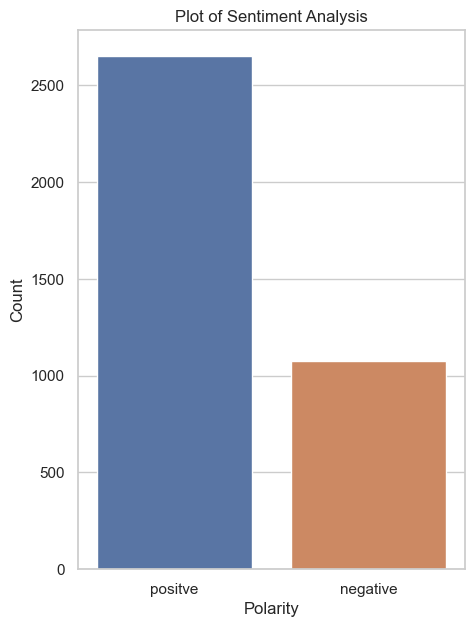

In [28]:
# Plot the 'polarity' column
plt.figure(figsize=(5, 7))
sns.set_theme(style="whitegrid")
sns.countplot(x=df["polarity"])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Plot of Sentiment Analysis')
plt.show()